# Text Clustering and Topic Modeling
#### Applied Text Mining - Utrecht Summer School

Welcome to the fourth practical of the course “Applied Text Mining”. In this practical, we will apply a clustering and a topic modeling approach on news articles and cluster them into different categories.

### Let's get started!

### Exercises

1\. **Here we are going to use a again the BBC news article datasets, but this time we are using the BBCSport data (http://mlg.ucd.ie/datasets/bbc.html). This dataset provided for use as benchmarks for machine learning research. The BBCSport dataset consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005: athletics, cricket, football, rugby, tennis. Your first task is to load the dataset so that you can proceed. Do not forget to import the necessary dependencies, you are going to need. You can import the other ones as you go along.**

In [5]:
from sklearn.datasets import load_files
import pandas as pd

# for reproducibility
random_state = 0 

#DATA_DIR = "./bbc/"
DATA_DIR = "C:/Users/ayoub/Downloads/bbcsport-fulltext/bbcsport"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head()

,text,label
0,England victory tainted by history\n\nAs Engla...,1
1,"Australia complete sweep\n\nThird Test, Sydney...",1
2,UK Athletics agrees new kit deal\n\nUK Athleti...,0
3,Bekele sets sights on world mark\n\nOlympic 10...,0
4,Captains lining up for Aid match\n\nIreland's ...,3


2\. **For text clustering and topic modeling, we will ignore the labels but we will use them while evaluating models. Create a copied dataframe removing the outcome variable.**

3\. **Apply the following pre-processing steps and then convert the data to a dataframe of document-term matrix with term frequencies:**
- convert to lower
- remove stop words
- remove numbers
- remove punctuation


In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

# K-Means

4\. **Let’s apply the KMeans algorithm. Since the dataset contains articles that belong to one of 5 categories, choose 5 as the number of clusters.**

In [9]:
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

4\. **What are the top terms in each cluster?**

In [ ]:
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
# https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

5\. **Now we want to visualize the output of KMeans clustering. To do this, first use PCA to transform the high-dimensional feature space into 2 dimensions, and plot the points using a scatter plot.**

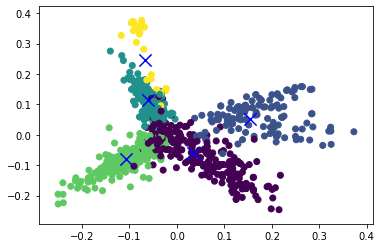

In [10]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

7\. **Evaluate the quality of the 5Means clustering with the sklearn metrics for clustering: homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score.**

Evaluation for unsupervised learning algorithms is a bit difficult and requires human judgement but there are some metrics which you might use. There are two kinds of metrics you can use depending on whether or not you have the labels. 

For example for evalauation with labelled dataset

If you have labelled dataset then you can use few metrics that give you an idea of how good your clustering model is. The one I’m going to show you here is homogeneity_score but you can find and read about many other metrics in sklearn.metrics module. As per the documentation, the score ranges between 0 and 1 where 1 stands for perfectly homogeneous labeling.

And another example for evaluation with unlabelled dataset

If you don’t have labels for your dataset, then you can still evaluate your clustering model with some metrics. One of them is Silhouette Coefficient. From the sklearn’s documentation:

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [15]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


from sklearn.metrics import silhouette_score
ss = silhouette_score(features, labels=cls.predict(features))

print(ss)

from sklearn.metrics import homogeneity_score
homogeneity_score(df.label, cls.predict(features))

NameError: name 'metrics' is not defined

8\. **Apply the steps in questions 4 and 5, by choosing 2 and 10 as the number of clusters. Compare the visualisations. (with a plot?) Apply the Elbow method to find the optimal k.**

In [ ]:
# https://www.kaggle.com/karthik3890/text-clustering
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

9\. **Manually create a dataframe with two news articles x and z, and predict cluster labels for new dataset with the optimal KMeans.**

In [ ]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

# Hierarchical Clustering

10\. **Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. Apply the Hierarchical Clustering with ward linkage.**

In [39]:
from sklearn.cluster import AffinityPropagation
cls_aff = AffinityPropagation(damping = 0.6,affinity = 'euclidean').fit(features)
cls_aff
cluster_centers_indices = cls_aff.cluster_centers_indices_
labels = cls_aff.labels_

no_clusters = len(cluster_centers_indices)
no_clusters

135

In [41]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(features.toarray())

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [43]:
print(cluster.labels_)


[1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 

In [45]:
plt.scatter(features.toarray()[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


NameError: name 'X' is not defined

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

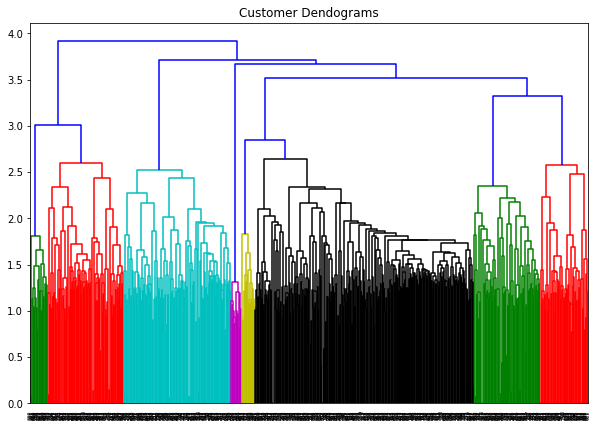

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(features.toarray(), method='ward'))

11\. **Plot the dendrogram of the hierarchical clustering.**

# Topic Modeling

Topic modeling is another unsupervised method for text mining applications where we want to get an idea of what topics we have in our dataset. A topic is nothing more than a collection of words that describe the overall theme. For example, in case of news articles, you might think of topics as the categories in the dataset. Just like clustering algorithms, there are some algorithms that need you to specify the number of topics you want to extract from the dataset and some that automatically determine the number of topics. In this post, I’m going to use Non Negative Matrix Factorization (NMF) method for modeling. You can also simply swap the NMF with Latent Dirichlet Allocation (LDA). You can check sklearn’s documentation for more details about NMF and LDA. They are available in sklearn.decomposition module.

12\. **Train a Negative Matrix Factorization model for topic modeling on a tf document-term matrix of the BBCSport dataset.**

In [48]:
# number of topics to extract
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

13\. **Show top 10 words per topic with their probabilities.**

In [50]:
cls.components_

array([[0.03120394, 0.        , 0.00146922, ..., 0.00748198, 0.00349521,
        0.        ],
       [0.02454462, 0.        , 0.00367175, ..., 0.00870648, 0.00014159,
        0.        ],
       [0.02142049, 0.1132532 , 0.01140155, ..., 0.00534852, 0.        ,
        0.01246421],
       [0.00801171, 0.        , 0.        , ..., 0.        , 0.02576174,
        0.00053552],
       [0.00568764, 0.01357571, 0.        , ..., 0.        , 0.00013022,
        0.        ]])

In [53]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 10

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 chelsea arsenal league united liverpool club mourinho said cup manager 
1 pakistan test cricket series india day south australia africa england 
2 open world champion seed year set final indoor said win 
3 england wales ireland robinson nations france rugby half scotland game 
4 kenteris greek thanou iaaf drugs athens doping olympics athletics charges 


14\. **Use the NMF model and identify the topic of a new text: "Robben open to playing at Euro 2020 with Netherlands after bagging two assists for Groningen"? Simply call the transform function of the model and it will give you a score of each topic. Choose the topic with the highest score to determine it’s topic.**

In [ ]:
new_articles = [
    "Playstation network was down so many people were angry",
    "Germany scored 7 goals against Brazil in worldcup semi-finals"
]
# first transform the text into features using vec
# then pass it to transform of cls
# the result will be a matrix of shape [2, 10]
# then we sort the topic id based on the score using argsort
# and take the last one (with the highest score) for each row using `[:,-1]` indexing
cls.transform(vec.transform(new_articles)).argsort(axis=1)[:,-1]

15\. ****Train a Latent Dirichlet Allocation model for topic modeling and repeat the steps in 12, 13 and 14.****

16\. **Compare the performance of the LDA model versus the NMF model.**